In [88]:
# predict calls with random forest


In [1]:
import pandas as pd
import numpy as np
import xgboost
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [2]:
df = pd.read_csv('/Users/kata/Desktop/GitHub/standby_duty_forecasting/sickness_table.csv', index_col=0)
df['date'] = pd.to_datetime(df['date'])
df['year']= df['date'].dt.year
df['month']= df['date'].dt.month
df['day_of_week'] = df['date'].dt.dayofweek
df['week'] = df['date'].dt.isocalendar().week
df['week'] = df['week'].astype(np.int64)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1152 entries, 0 to 1151
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1152 non-null   datetime64[ns]
 1   n_sick       1152 non-null   int64         
 2   calls        1152 non-null   float64       
 3   n_duty       1152 non-null   int64         
 4   n_sby        1152 non-null   int64         
 5   sby_need     1152 non-null   float64       
 6   dafted       1152 non-null   float64       
 7   year         1152 non-null   int64         
 8   month        1152 non-null   int64         
 9   day_of_week  1152 non-null   int64         
 10  week         1152 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(7)
memory usage: 108.0 KB


In [46]:
X = df[['year', 'month', 'day_of_week',
       'week']]
y = df.calls

In [47]:
def train_test_split(data, n_test):
	return data[:n_test], data[n_test:]


x_train, x_test = train_test_split(X, 921)
y_train, y_test = train_test_split(y, 921)


In [48]:
model = XGBRegressor()

In [49]:
model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [59]:
pred = model.predict(x_test)

pred = pd.Series(pred)
pred = pred.reset_index()
y_test = y_test.reset_index()


In [66]:
y_news = pd.concat([pred, y_test], axis=1).reset_index(drop=True)
y_news = y_news.drop(['index', 'level_0'], axis=1)
y_news[0].max()

13672.5791015625

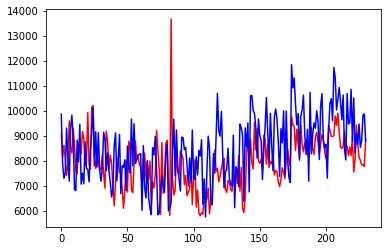

In [65]:
import matplotlib.pyplot as plt
plt.plot(y_news[0], color='red', label='pred')
plt.plot(y_news.calls, color='blue', label='true')
plt.show()


In [97]:
mean_squared_error(y_test, pred)
# 2092620.6058171096

2092620.6058171096

In [15]:
Accuracy=r2_score(y_test,pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is -24.77


In [99]:
# decision tree?
from sklearn.ensemble import RandomForestRegressor


In [100]:
regressor = RandomForestRegressor()

In [101]:
regressor.fit(x_train, y_train)

RandomForestRegressor()

In [102]:
y_pred = regressor.predict(x_test)

y_pred

array([9369.42, 8962.32, 9212.34, 8580.6 , 7845.12, 7654.44, 9303.42,
       9010.92, 8717.64, 9066.72, 8591.7 , 7734.06, 7384.08, 9007.86,
       8852.52, 8607.18, 8913.3 , 8588.7 , 7556.22, 7547.28, 9348.6 ,
       9022.68, 8913.  , 9234.84, 8790.36, 7802.46, 7349.64, 8258.76,
       8237.58, 7759.8 , 7613.94, 7544.28, 7352.46, 6780.48, 8655.84,
       8636.64, 7867.38, 7906.32, 7559.52, 7054.08, 6412.74, 7588.86,
       8264.1 , 8047.44, 7480.62, 7331.94, 6976.26, 6341.76, 7478.76,
       8070.9 , 7398.06, 8052.9 , 7722.  , 7068.96, 6622.62, 7971.96,
       8467.5 , 7951.74, 7903.56, 7503.12, 7434.12, 6886.68, 7604.94,
       7883.52, 7378.38, 7648.14, 7012.5 , 7463.7 , 6179.16, 7467.66,
       7252.2 , 7488.36, 8108.88, 7624.26, 7419.24, 6023.22, 8009.04,
       7307.64, 7387.56, 7907.4 , 7749.36, 7093.26, 6045.36, 9370.14,
       7542.06, 6777.96, 6894.06, 8001.42, 7541.46, 7396.92, 8172.3 ,
       8138.7 , 8056.2 , 7218.66, 7464.54, 6777.36, 6760.38, 7168.62,
       7560.3 , 6770

In [103]:
mean_squared_error(y_test, y_pred)
#1743722.4680571433

1740226.4824051948

In [104]:
Accuracy=r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is -3.75


In [105]:
# SVM
from sklearn.svm import SVR

In [106]:
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

SVR()

In [107]:
y_pred = regressor.predict(x_test)


In [108]:
mean_squared_error(y_test, y_pred)
# 1970608.4805071584

1970608.4805071584

In [109]:
Accuracy=r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is -17.49


In [110]:
# linear regression
from sklearn.linear_model import LinearRegression


In [111]:
linreg=LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression()

In [112]:
y_pred=linreg.predict(x_test)


In [113]:
mean_squared_error(y_test, y_pred)
# 1728872.9009036084

1728872.9009036084

In [114]:
Accuracy=r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is -3.08
